## Curso Python para Economistas
### Trabajo Práctico Nº 6 (integrador)

### Fecha de entrega:
Martes 12/11 a las 23:59 hs\*

\* *tienen una semana más que lo usual para resolver este TP*

### Modalidad de entrega y trabajo
- Este TP es **individual**.
- Un repositorio **privado** debe ser creado en GitHub para el TP, y dar acceso a los 5 profesores. Los nombres de usuarios son: `belenmichel`, `rbonazzola`, `Queeno11`, `agoszulli` y `pilarch`.
- Cuando hayan hecho ese último commit, copien la URL para clonar su repositorio y péguenla en
[este Google Sheet](https://docs.google.com/spreadsheets/d/1byFOKyV7UnBuPuF9X2JWFVOUZX36b2_CEDw9ColP7VQ/edit?usp=sharing), en la hoja del TP6. Al ser un repositorio privado, solo los colaboradores habilitados podrán clonarlo.
- Al finalizar el trabajo práctico deben hacer un último commit y push en su repositorio de GitHub con el mensaje `"Entrega final del TP6"`. Antes de la fecha y hora de entrega pueden hacer cuantos cambios quieran en el repositorio, pero luego de la hora de corte no deben hacer más cambios. Si un commit con el mensaje anterior se realiza luego de la hora de entrega, se supondrá que la entrega tardía fue intencional y se utilizarán los días de gracia. La última versión en el repositorio es la que será evaluada. Para esto es importante que no completen el Google Sheet hasta que no hayan finalizado el TP, como tampoco hacer pushes posteriores a la entrega.
- Comentar su código y utilizar buenas prácticas en el estilo del mismo tendrá un peso en la nota de este trabajo (1pto por inciso). Pueden utilizar esta [guía de estilo](https://recursospython.com/pep8es.pdf) como referencia.

## Consignas

#### Parte 1:
Esta parte del trabajo es abierta: los detalles de las consignas no están definidas al 100% y deberán usar sus intereses y criterios para guiarlos.
El objetivo de esta parte es que pongan a prueba las habilidades desarrolladas para conectarse a una API REST que sea de su interés. Nuestra sugerencia es que comiencen a pensar en datos con los cuales les gustaría trabajar en sus tesis y que exploren nuevas páginas web y datos con los que no han trabajado anteriormente. 

1. **Elección de una API REST** (5 puntos): Elijan una API pública que sea de interés para ustedees y justifiquen por qué les resulta interesante trabajar con los datos de esa API. Detallen la pregunta de investigación que les gustaría responder con esos datos. 

   Aquí tienen algunas sugerencias:

- [API de datos.gob.ar](https://datos.gob.ar/apis) (datos de Argentina)
- [IDB API](https://mydata.iadb.org/) (indicadores económicos y + de America Latina y el Caribe)
- [World Bank API](https://data.worldbank.org/indicator) (indicadores económicos globales)
- O pueden buscar otras APIs en [este link](https://github.com/public-apis/)

**Respuesta**: 

Uso la API de Series de Tiempo AR, ayudándome del generador de URLs (https://datosgobar.github.io/series-tiempo-ar-call-generator/) que me permite ver todas las series disponibles e identificar muy fácilmente la URL deseada.
Elijo la serie del Índice del Costo de la Construcción por gran componente, que en realidad está compuesto por 3 series de tiempo: una para el componente materiales, otra para la mano de obra y otra que indica el nivel general. 
Me interesa ver cómo fue la variación temporal de estas tres, especialmente ver la diferencia en la variación de cada uno de los componentes, ya que esto nos puede dar indicios de la evolución de los salarios de los empleados de la construcción, así como el peso relativo de estos en los costos totales del rubro.

2. **Conectar con la API y extraer datos** (5 puntos)
    - Hagan una solicitud a la API utilizando el módulo `requests` de Python.
    - Definan parámetros adecuados para obtener un conjunto de datos relevante para el uso que has planteado.
    - Asegúrense de manejar correctamente el caso en que la solicitud falle (por ejemplo, con un mensaje de error o un valor predeterminado).

In [1]:
import requests
import pandas as pd

In [2]:
def get_costo_construccion(componente):
    # Me creo un diccionario con los valores que puede tomar componente como key y el texto de la url correspondiente como value
    componentes = {
        "Mano de obra": "aRxVTe",
        "Materiales": "PvexBm",
        "Nivel general": "HydoB9"
    }

    # Como la forma de escribir el componente puede variar, me aseguro de que sea accesible incluso cuando no me acuerdo 
    # exactamente como escribirlos o cuáles son los valores posibles
    if componente in componentes:
        #extraigo el texto a insertar en la url correspondiente al valor de componente que pasé como parámetro al llamar a la función
        text = componentes[componente]
    else:
        raise ValueError("Componente no válido. Debe ser 'Mano de obra', 'Materiales' o 'Nivel general'.")

    # Construyo la url de acuerdo al componente solicitado
    url = f"https://apis.datos.gob.ar/series/api/series?ids=Costo_construccion_{text}"

    # Manejo de errores: si la solicitud se procesó bien, importo la data. Sino, indico de qué error se trata
    try:
        response = requests.get(url)
        if response.status_code == 200:
            indices = response.json()  # Obtener los datos de la respuesta
            if 'data' in indices and len(indices['data'])>0:
                return indices['data']
            else:
                return "No hay datos disponibles"
        else:
            return "Error en la solicitud"
    except requests.RequestException:
        return "Error de conexión"


In [3]:
# Llamo a la función y me guardo la respuesta (que viene por el return) en data
indices_mdo = get_costo_construccion("Mano de obra")
indices_mat = get_costo_construccion("Materiales")
indices_gral = get_costo_construccion("Nivel general")

In [4]:
print(indices_mdo)
print(type(indices_mdo))

[['2002-01-01', 4.3], ['2002-02-01', 4.3], ['2002-03-01', 4.4], ['2002-04-01', 4.4], ['2002-05-01', 4.4], ['2002-06-01', 4.4], ['2002-07-01', 4.9], ['2002-08-01', 4.9], ['2002-09-01', 4.9], ['2002-10-01', 4.9], ['2002-11-01', 4.9], ['2002-12-01', 4.9], ['2003-01-01', 5.1], ['2003-02-01', 5.1], ['2003-03-01', 5.1], ['2003-04-01', 5.1], ['2003-05-01', 5.2], ['2003-06-01', 5.2], ['2003-07-01', 5.5], ['2003-08-01', 5.8], ['2003-09-01', 6.0], ['2003-10-01', 6.2], ['2003-11-01', 6.5], ['2003-12-01', 6.7], ['2004-01-01', 7.1], ['2004-02-01', 7.3], ['2004-03-01', 7.4], ['2004-04-01', 7.5], ['2004-05-01', 7.5], ['2004-06-01', 7.5], ['2004-07-01', 7.5], ['2004-08-01', 7.5], ['2004-09-01', 7.5], ['2004-10-01', 7.5], ['2004-11-01', 7.9], ['2004-12-01', 8.5], ['2005-01-01', 9.0], ['2005-02-01', 9.0], ['2005-03-01', 9.6], ['2005-04-01', 9.9], ['2005-05-01', 9.9], ['2005-06-01', 10.0], ['2005-07-01', 10.1], ['2005-08-01', 10.2], ['2005-09-01', 10.3], ['2005-10-01', 11.2], ['2005-11-01', 12.0], ['2005

3. a) **Convertir los datos a un DataFrame de pandas** (5 puntos)
- Conviertan la respuesta de la API a un `DataFrame` de pandas.
- Verifiquen el formato de los datos y asegúrense de que están listos para su análisis.
- Incluyan las columnas necesarias para identificar el origen de los datos (por ejemplo, país, fecha, nombre del activo, etc.).

3. b) **Realizar una transformación de los datos** (5 puntos)

Apliquen alguna transformación relevante, como:
- Preservar sólo datos de un período específico o de un lugar específico.
- Crear una columna calculada (por ejemplo, una tasa de cambio o promedio).
- Convertir unidades de medida o redondear valores.
- Eliminar registros con datos faltantes.

In [5]:
df_mdo = pd.DataFrame(indices_mdo, columns=["fecha", "indice_mdo"])
df_mat = pd.DataFrame(indices_mat, columns=["fecha", "indice_mat"])
df_gral = pd.DataFrame(indices_gral, columns=["fecha", "indice_gral"])

In [6]:
df_indices = df_mdo.merge(df_mat, on="fecha", how="inner").merge(df_gral, on="fecha", how="inner")

In [7]:
df_indices.head(5)

,fecha,indice_mdo,indice_mat,indice_gral
0,2002-01-01,4.3,5.8,5.0
1,2002-02-01,4.3,6.6,5.5
2,2002-03-01,4.4,7.5,5.9
3,2002-04-01,4.4,8.1,6.2
4,2002-05-01,4.4,8.5,6.4


In [8]:
print(df_mdo.shape)
print(df_mat.shape)
print(df_gral.shape) 
print(df_indices.shape) 
# Veo que los 3 df originales tienen la misma cantidad de filas que el combinado, por lo que no perdí ninguna fecha

(100, 2)
(100, 2)
(100, 2)
(100, 4)


In [9]:
for column in df_indices.columns:
    print(f"Columna: {column}, Tipo: {df_indices[column].dtype}")

# Veo que la columna de fecha está como string, por lo que la transformo a formato fecha
df_indices["fecha"] = pd.to_datetime(df_indices["fecha"])

Columna: fecha, Tipo: object
Columna: indice_mdo, Tipo: float64
Columna: indice_mat, Tipo: float64
Columna: indice_gral, Tipo: float64


In [10]:
for column in df_indices.columns:
    print(f"Columna: {column}, Tipo: {df_indices[column].dtype}")

Columna: fecha, Tipo: datetime64[ns]
Columna: indice_mdo, Tipo: float64
Columna: indice_mat, Tipo: float64
Columna: indice_gral, Tipo: float64


In [11]:
# Los datos son todos de un mismo origen, pero si se quisiera unir los índices de otros países luego al mismo df para hacer comparaciones
# podría ser útil incluir una columna llamada "pais" que identifique a las observaciones con valor "argentina". Esto sería así
df_indices["pais"]="Argentina"
df_indices.head(5)

,fecha,indice_mdo,indice_mat,indice_gral,pais
0,2002-01-01,4.3,5.8,5.0,Argentina
1,2002-02-01,4.3,6.6,5.5,Argentina
2,2002-03-01,4.4,7.5,5.9,Argentina
3,2002-04-01,4.4,8.1,6.2,Argentina
4,2002-05-01,4.4,8.5,6.4,Argentina


In [12]:
df_indices["var_mensual_mdo"] = (((df_indices["indice_mdo"]/df_indices["indice_mdo"].shift(1))-1)*100).round(2)
df_indices["var_mensual_mat"] = (((df_indices["indice_mat"]/df_indices["indice_mat"].shift(1))-1)*100).round(2)
df_indices["var_mensual_gral"] = (((df_indices["indice_gral"]/df_indices["indice_gral"].shift(1))-1)*100).round(2)

In [13]:
df_indices.head(5)

,fecha,indice_mdo,indice_mat,indice_gral,pais,var_mensual_mdo,var_mensual_mat,var_mensual_gral
0,2002-01-01,4.3,5.8,5.0,Argentina,NaN,NaN,NaN
1,2002-02-01,4.3,6.6,5.5,Argentina,0.00,13.79,10.00
2,2002-03-01,4.4,7.5,5.9,Argentina,2.33,13.64,7.27
3,2002-04-01,4.4,8.1,6.2,Argentina,0.00,8.00,5.08
4,2002-05-01,4.4,8.5,6.4,Argentina,0.00,4.94,3.23


4. **Generar una Visualización de los Datos** (5 puntos)
    - Usen `matplotlib` o `seaborn` para crear un gráfico relevante, como:
        - Una serie de tiempo (si tienen datos temporales),
        - Un gráfico de barras para comparar categorías,
        - Un diagrama de dispersión o histograma, dependiendo de los datos,
        - Un boxplot,
        - Etc.
    - Asegúrense de etiquetar e incluir un título descriptivo en el gráfico.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
import locale

# Configurar el idioma en español
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')

'Spanish_Spain.1252'

In [16]:
# Para graficar la serie de tiempo sería más útil tener una variable con el mes y el año, eliminando el día pues la medición corresponde
# siempre al mismo día del mes
x = df_indices['fecha'].dt.strftime('%b %Y')

y1 = df_indices["indice_mdo"]
y2 = df_indices["indice_mat"]
y3 = df_indices["indice_gral"]

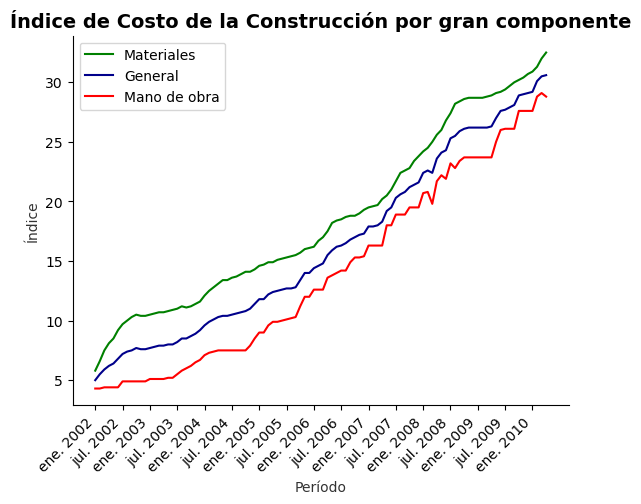

In [17]:
plt.plot(x, y2, color='green', label='Materiales')
plt.plot(x, y3, color='DarkBlue', label='General')
plt.plot(x, y1, color='red', label='Mano de obra')


plt.xlabel('Período', color='0.2')
plt.ylabel('Índice', color='0.2')


plt.title("Índice de Costo de la Construcción por gran componente", 
          fontdict={
              'size': 14,
              'color': 'black',
              'weight': 'bold'
})

plt.legend()

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)

x_ticks = x[::6]
plt.xticks(x_ticks, rotation=45, horizontalalignment="right")

plt.show()

___

#### Parte 2:
Aquí volvemos a las consignas definidas: vamos a utilizar un informe de ANSES (en formato PDF) así como información disponible en el sitio web de ANSES para resolver los siguientes problemas.

5. (10 puntos) Generar un código que les permita extraer la tabla de número personas con beneficios de desempleo de este informe de ANSES en formato PDF y generar un dataframe de Pandas. Para ello pueden usar la librería `tabula-py` que vimos en clase. Los valores numéricos deben quedar en un tipo de dato numérico.

In [18]:
import tabula

In [19]:
 # Defino los nombres de las columnas
header = ["provincia",
         "beneficios", 
         "porcentaje"]

# Defino el perímetro y diferencio las columnas a extraer. 
# El valor por el cual multiplico los cm sale de acá: https://stackoverflow.com/questions/45457054/tabula-extract-tables-by-area-coordinates
perimetro = (83.99*2.8346456693, 27.02*2.8346456693, 230.22*2.8346456693, 126.08*2.8346456693)
columnas = (68.35*2.8346456693, 94.90*2.8346456693, 126.08*2.8346456693)

lst_of_df = tabula.read_pdf("Informe-Estadisticas-SS-II-Trim-2024.pdf", output_format='dataframe', 
                            pages=21, area = perimetro, columns = columnas)

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


In [20]:
lst_of_df

[              Provincia  Beneficios     %
 0          Buenos Aires      45.477   37%
 1              Santa Fe       8.608    7%
 2               Córdoba       7.770    6%
 3                  CABA       6.014    5%
 4              San Juan       4.866    4%
 5               Mendoza       4.691    4%
 6   Santiago del Estero       4.294    3%
 7            Entre Ríos       3.798    3%
 8               Tucumán       3.673    3%
 9                 Salta       3.494    3%
 10             Misiones       3.428    3%
 11                Chaco       3.360    3%
 12              Formosa       2.915    2%
 13           Corrientes       2.826    2%
 14               Chubut       2.708    2%
 15           Santa Cruz       2.478    2%
 16             San Luis       2.360    2%
 17     Tierra del Fuego       1.995    2%
 18            Río Negro       1.787    1%
 19             La Rioja       1.735    1%
 20                Jujuy       1.630    1%
 21            Catamarca       1.460    1%
 22        

In [21]:
# Me quedo con el primer elemento de la lista de tablas, aunque esto no es necesario porque extrajo uno sólo
tabla_p21 = lst_of_df[0]

# Le asigno los nombres de las columnas
tabla_p21.columns = header
tabla_p21

,provincia,beneficios,porcentaje
0,Buenos Aires,45.477,37%
1,Santa Fe,8.608,7%
2,Córdoba,7.770,6%
3,CABA,6.014,5%
4,San Juan,4.866,4%
5,Mendoza,4.691,4%
6,Santiago del Estero,4.294,3%
7,Entre Ríos,3.798,3%
8,Tucumán,3.673,3%
9,Salta,3.494,3%


In [22]:
# Se importaron los puntos como separadores de decimales, por lo que tengo que transformar los valores mayores a 999 
# (que fueron afectados) multiplicándolos por 1000. 
tabla_p21["beneficios"] = tabla_p21["beneficios"].apply(lambda x: x if x == 746 else x*1000)

In [23]:
tabla_p21

,provincia,beneficios,porcentaje
0,Buenos Aires,45477.0,37%
1,Santa Fe,8608.0,7%
2,Córdoba,7770.0,6%
3,CABA,6014.0,5%
4,San Juan,4866.0,4%
5,Mendoza,4691.0,4%
6,Santiago del Estero,4294.0,3%
7,Entre Ríos,3798.0,3%
8,Tucumán,3673.0,3%
9,Salta,3494.0,3%


In [24]:
for column in tabla_p21.columns:
    print(f"Columna: {column}, Tipo: {tabla_p21[column].dtype}")
# Veo que porcentaje está como string

Columna: provincia, Tipo: object
Columna: beneficios, Tipo: float64
Columna: porcentaje, Tipo: object


In [25]:
import re

In [26]:
# Uso una expresión regular para extraer el número y transformar la variable porcentaje
regex = r'(\d+)%'
regex = re.compile (regex)

def extraer_porcentaje(valor):
    match = regex.search(valor)
    return int(match.group(1))

# Uso extraer_porcentaje para reemplazar los valores de la columna "porcentaje" por un valor numérico
tabla_p21['porcentaje'] = tabla_p21['porcentaje'].apply(extraer_porcentaje)

In [27]:
tabla_p21

,provincia,beneficios,porcentaje
0,Buenos Aires,45477.0,37
1,Santa Fe,8608.0,7
2,Córdoba,7770.0,6
3,CABA,6014.0,5
4,San Juan,4866.0,4
5,Mendoza,4691.0,4
6,Santiago del Estero,4294.0,3
7,Entre Ríos,3798.0,3
8,Tucumán,3673.0,3
9,Salta,3494.0,3


In [28]:
# Chequeo que la columna "porcentaje" haya quedado numérica
for column in tabla_p21.columns:
    print(f"Columna: {column}, Tipo: {tabla_p21[column].dtype}")

Columna: provincia, Tipo: object
Columna: beneficios, Tipo: float64
Columna: porcentaje, Tipo: int64


In [29]:
tabla_p21

,provincia,beneficios,porcentaje
0,Buenos Aires,45477.0,37
1,Santa Fe,8608.0,7
2,Córdoba,7770.0,6
3,CABA,6014.0,5
4,San Juan,4866.0,4
5,Mendoza,4691.0,4
6,Santiago del Estero,4294.0,3
7,Entre Ríos,3798.0,3
8,Tucumán,3673.0,3
9,Salta,3494.0,3


6. (10 puntos) Usando los datos anteriores, generar un mapa coloreado de las provincias de Argentina, donde las provincias con más desempleo estén en tonos de rojo y las provincias con menor desempleo estén en tonos de azul.

In [30]:
# Por lo que veo en https://www.argentina.gob.ar/datos-abiertos/georef/openapi#/, la API de datos.gob permite solamente 
# importar puntos y no polígonos (los cuales necesitamos para hacer un mapa). Por ello recurro nuevamente a los polígonos del IGN

In [31]:
from shapely.geometry import Point
import geopandas as gpd

In [32]:
PROVINCIAS = "provincia_shp\provincia.shp"
provincias_gdf = gpd.read_file(filename=PROVINCIAS)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Sofia\AppData\Local\Temp\ipykernel_7544\3207407166.py:1: SyntaxWarning: invalid escape sequence '\p'
  PROVINCIAS = "provincia_shp\provincia.shp"
Cannot find header.dxf (GDAL_DATA is not defined)


In [33]:
provincias_gdf = provincias_gdf[["nam", "geometry"]]
provincias_gdf = provincias_gdf.rename({"nam": "provincia"}, axis=1)
provincias_gdf

,provincia,geometry
0,Ciudad Autónoma de Buenos Aires,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,Neuquén,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,San Luis,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,Santa Fe,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,La Rioja,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8..."
5,Catamarca,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1..."
6,Tucumán,"POLYGON ((-65.35915 -26.05944, -65.35868 -26.0..."
7,Chaco,"POLYGON ((-62.32434 -24.12318, -62.31959 -24.1..."
8,Formosa,"POLYGON ((-62.31201 -22.48666, -62.31056 -22.4..."
9,Santa Cruz,"MULTIPOLYGON (((-67.59361 -46.01744, -67.59357..."


In [34]:
from shapely.geometry.multipolygon import MultiPolygon

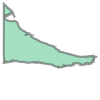

In [35]:
# provincias_gdf tiene a Tierra del Fuego, Antártida e Islas del Atlántico Sur dentro de un mismo multipolígono. 
# Sin embargo, yo no quiero que la Antártida y las Islas del Atlámtico Sur se vean en el mapa porque no tienen datos de ANSES 
# y perjudican la visualización del gráfico. 
# Entonces, extraigo los polígonos de TDF para mantener solamente a Tierra del Fuego en ese multipolígono
TdF_bounding_box = (-75,-60,-40,-55)
xmin, ymin, xmax, ymax = TdF_bounding_box
TdF_Antartida_islas = provincias_gdf.cx[xmin:xmax, ymin:ymax]
TdF_muchos_poligonos = TdF_Antartida_islas.geometry.explode(index_parts=True)
TdF_muchos_poligonos = TdF_muchos_poligonos.cx[xmin:xmax, ymin:ymax] #Me quedo con los polígonos dentro del bounding box (las de TDF)
TdF_muchos_poligonos = TdF_muchos_poligonos.to_list() # Convierto en lista
TdF_multipol = MultiPolygon(TdF_muchos_poligonos) # Combino los polígonos individuales de la lista en un solo objeto multipolígono
TdF_multipol


In [36]:
# Creo un df con una única fila con el nombre de la provincia y una columna llamada 'nam'
TdF_df = pd.DataFrame(["Tierra del Fuego"], columns=["provincia"]) 

# Creo un gdf a partir del df TdF_IM_df
TdF_fila = gpd.GeoDataFrame(TdF_df, geometry=[TdF_multipol], crs=4326)

# Elimino la fila de TDF, Antártida e Islas
provincias_gdf = provincias_gdf.drop(23).reset_index(drop=True)

# La reemplazo por la nueva fila que cree con la geometría corregida
provincias_gdf = pd.concat([provincias_gdf, TdF_fila]).reset_index(drop=True)

In [37]:
provincias_gdf

,provincia,geometry
0,Ciudad Autónoma de Buenos Aires,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,Neuquén,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,San Luis,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,Santa Fe,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,La Rioja,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8..."
5,Catamarca,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1..."
6,Tucumán,"POLYGON ((-65.35915 -26.05944, -65.35868 -26.0..."
7,Chaco,"POLYGON ((-62.32434 -24.12318, -62.31959 -24.1..."
8,Formosa,"POLYGON ((-62.31201 -22.48666, -62.31056 -22.4..."
9,Santa Cruz,"MULTIPOLYGON (((-67.59361 -46.01744, -67.59357..."


In [38]:
# Renombro a CABA para que coincida y poder hacer el merge
tabla_p21["provincia"] = tabla_p21["provincia"].replace("CABA", "Ciudad Autónoma de Buenos Aires")

In [39]:
ben_prov_gdf = provincias_gdf.merge(tabla_p21, how="inner", on="provincia")

In [40]:
ben_prov_gdf

,provincia,geometry,beneficios,porcentaje
0,Ciudad Autónoma de Buenos Aires,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5...",6014.0,5
1,Neuquén,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1...",1412.0,1
2,San Luis,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8...",2360.0,2
3,Santa Fe,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9...",8608.0,7
4,La Rioja,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8...",1735.0,1
5,Catamarca,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1...",1460.0,1
6,Tucumán,"POLYGON ((-65.35915 -26.05944, -65.35868 -26.0...",3673.0,3
7,Chaco,"POLYGON ((-62.32434 -24.12318, -62.31959 -24.1...",3360.0,3
8,Formosa,"POLYGON ((-62.31201 -22.48666, -62.31056 -22.4...",2915.0,2
9,Santa Cruz,"MULTIPOLYGON (((-67.59361 -46.01744, -67.59357...",2478.0,2


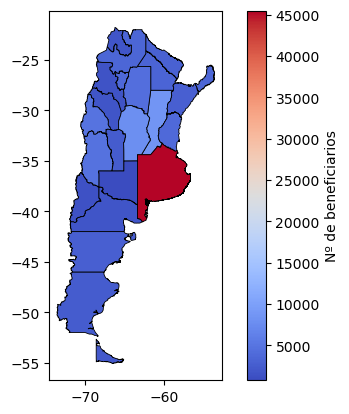

In [41]:
ben_prov_gdf.plot(column="beneficios", 
                               cmap='coolwarm', 
                               edgecolor='black', 
                               linewidth = 0.6,
                               legend=True, 
                               legend_kwds={'label': "Nº de beneficiarios", 'orientation': "vertical"}, 
                               missing_kwds={'color':"#efefef"}
                        )

plt.show()

7. (20 puntos) Ahora utilicemos los datos de la siguiente página de ANSES: https://www.anses.gob.ar/oficinas-atencion-al-publico, donde detalla las ubicaciones de las oficinas de atención al público de ANSES. Los datos se muestran en una tabla, la cual está paginada de 1 a 8.

Nos encontramos con los siguientes desafíos: si prueban, van a notar que el sitio de ANSES no permite realizar consultas programáticas usando la librería `requests`, como veníamos haciendo. Por esa razón, vamos a tener que cambiar el enfoque: vamos a guardar el archivo HTML de la página localmente, y utilizar BeautifulSoup directamente en el contenido de este archivo (en lugar de hacer un `requests.get` a internet). El otro desafío es que el código HTML cambia con cada página. Deberán guardar un archivo HTML por cada una de las 8 páginas.

Finalmente, iteren sobre estos 8 archivos, extrayendo una a una las tablas. Finalmente, concatenaremos los resultados para generar un único dataframe con la información de todas las oficinas en cada fila.

In [42]:
import requests #html requestor
from bs4 import BeautifulSoup #html parser

In [44]:
# Inicializo un df con las columnas a importar
df = pd.DataFrame(columns=['provincia', 'localidad', 'nombre', 'direccion', 'horario', 'ubicacion'])

# Importo de un mismo html porque lo descargué como página web, sólo HTML
with open(f"Oficinas_de_atencion_al_publico_ANSES.html", "r", encoding="utf-8") as file:
        anses_html_content= file.read()
        soup = BeautifulSoup(anses_html_content, 'html.parser')
        
        info = soup.find_all('tr')
        
        for i, item in enumerate(info): 
            if i != 0:
                datos_de_fila = item.find_all('td') #td engloba al contenido de cada columna
                fila = []
                for dato in datos_de_fila:
                    fila.append(dato.text)
                
                print('\nFila:', i)
                print(fila)
                df.loc[i-1]=fila


Fila: 1
['Buenos Aires', '25 de Mayo', '25 de Mayo', 'Calle 10 Nº 1145   ', '08.30 a 14.30hs', 'Ver en mapa']

Fila: 2
['Buenos Aires', '9 de Julio', '9 de Julio', 'Libertad 1102', '08.30 a 14.30hs', 'Ver en mapa']

Fila: 3
['Buenos Aires', 'Alberti', 'Alberti', '10 de junio 167', '08.30 a 14.30hs', 'Ver en mapa']

Fila: 4
['Buenos Aires', 'Alejandro Korn', 'Alejandro Korn', 'Av. Presidente Juan Domingo Perón 4550', '08.30 a 14.30hs', 'Ver en mapa']

Fila: 5
['Buenos Aires', 'Ameghino', 'Ameghino', 'Sarmiento 414 (Calle 5) e/ 32 y34', '08.30 a 14.30hs', 'Ver en mapa']

Fila: 6
['Buenos Aires', 'América', 'América', 'Sarmiento 359, PB', '08.00 a 14.00hs', 'Ver en mapa']

Fila: 7
['Buenos Aires', 'Arrecifes', 'Arrecifes', 'Av. Merlassino 141', '08:00 a 14:00hs', 'Ver en mapa']

Fila: 8
['Buenos Aires', 'Ascensión', 'Ascensión', 'Libertad 12', '08.30 a 14.30hs', 'Ver en mapa']

Fila: 9
['Buenos Aires', 'Avellaneda', 'Avellaneda', 'French 58', '08.30 a 14.30hs', 'Ver en mapa']

Fila: 10
[

In [45]:
df

,provincia,localidad,nombre,direccion,horario,ubicacion
0,Buenos Aires,25 de Mayo,25 de Mayo,Calle 10 Nº 1145,08.30 a 14.30hs,Ver en mapa
1,Buenos Aires,9 de Julio,9 de Julio,Libertad 1102,08.30 a 14.30hs,Ver en mapa
2,Buenos Aires,Alberti,Alberti,10 de junio 167,08.30 a 14.30hs,Ver en mapa
3,Buenos Aires,Alejandro Korn,Alejandro Korn,Av. Presidente Juan Domingo Perón 4550,08.30 a 14.30hs,Ver en mapa
4,Buenos Aires,Ameghino,Ameghino,Sarmiento 414 (Calle 5) e/ 32 y34,08.30 a 14.30hs,Ver en mapa
...,...,...,...,...,...,...
384,Tucumán,Concepción de Tucumán,Concepción,24 de Septiembre 1308,08.00 a 14.00hs,Ver en mapa
385,Tucumán,Monteros,Monteros,Marco Alurralde 187,08.00 a 14.00hs,Ver en mapa
386,Tucumán,San Isidro de Lules,San Isidro de Lules,Alte. Brown 106,08.00 a 14.00hs,Ver en mapa
387,Tucumán,San Miguel de Tucumán,Tucumán,Córdoba 498,08.00 a 14.00hs,Ver en mapa


8. (20 puntos) Ahora obtengamos información georreferenciada de las oficinas de ANSES. Para ello hay dos caminos:

- a) podemos usar la API de domicilios vista en la clase 6, pasarle las direcciones de la tabla generada en el punto anterior, y obtener la latitud y longitud de tantas oficinas como puedan.
- b) Alternativamente, notar que el texto "Ver el mapa" de la página apunta a un link de Google Maps que tiene incluidas la latitud y longitud (en la mayoria de los casos, en unos pocos el link no contiene esta información y a esos pueden descartarlos); por lo tanto, pueden también parsear el código HTML de las páginas (por ejemplo, con expresiones regulares, aunque no es la única forma) para así extraer estos valores. Finalmente, teniendo la latitud y longitud, crear una columna de `geometry` como hicimos en el caso de las propiedades del TP5, y con esto generar un Geodataframe.

_Ayuda para el camino b): pueden leer el contenido del HTML como texto plano con `.read()` y usar el método de strings `.split`. Notar que la parte de los links contiene una tag `href` que pueden usar para partir el string completo._

In [46]:
# Creo un df vacío 
df_direc = pd.DataFrame(columns=['provincia', 'localidad', 'nombre', 'direccion', 'horario', 'ubicacion', 'lat', 'lon'])

# Creo una expresión regular para encontrar coordenadas enlaces de Maps y extraer las coordenadas
pattern = re.compile(r"https://maps\.google\.com/\?q=(-?\d+\.\d+),(-?\d+\.\d+)")

with open(f"Oficinas_de_atencion_al_publico_ANSES.html", "r", encoding="utf-8") as file:
    anses_html_content = file.read()
    soup = BeautifulSoup(anses_html_content, 'html.parser')
        
    info = soup.find_all('tr')
        
    for i, item in enumerate(info):
        if i != 0:
            # Extraer la información general de la fila
            datos_de_fila = item.find_all('td')
            fila = [dato.text for dato in datos_de_fila]

            # "a" indica que hay un link, por lo que busco links y armo una lista con ellos
            link = item.find("a", href=pattern)
            if link:
                match = pattern.search(link["href"])
                if match:
                    # Extraigo latitud y longitud de acuerdo a los grupos definidos en pattern
                    lat = float(match.group(1))
                    lon = float(match.group(2))
                else:
                    lat, lon = None, None
            else:
                lat, lon = None, None

            # Agrego la información al df
            fila.extend([lat, lon])
            fila_df = pd.DataFrame([fila], columns=df_direc.columns)
            df_direc = pd.concat([df_direc, fila_df], ignore_index=True)


C:\Users\Sofia\AppData\Local\Temp\ipykernel_7544\2981338188.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_direc = pd.concat([df_direc, fila_df], ignore_index=True)


In [47]:
df_direc

,provincia,localidad,nombre,direccion,horario,ubicacion,lat,lon
0,Buenos Aires,25 de Mayo,25 de Mayo,Calle 10 Nº 1145,08.30 a 14.30hs,Ver en mapa,-35.429473,-60.171813
1,Buenos Aires,9 de Julio,9 de Julio,Libertad 1102,08.30 a 14.30hs,Ver en mapa,-35.443995,-60.884364
2,Buenos Aires,Alberti,Alberti,10 de junio 167,08.30 a 14.30hs,Ver en mapa,-35.032430,-60.282217
3,Buenos Aires,Alejandro Korn,Alejandro Korn,Av. Presidente Juan Domingo Perón 4550,08.30 a 14.30hs,Ver en mapa,-34.989405,-58.381835
4,Buenos Aires,Ameghino,Ameghino,Sarmiento 414 (Calle 5) e/ 32 y34,08.30 a 14.30hs,Ver en mapa,-34.845296,-62.465633
...,...,...,...,...,...,...,...,...
384,Tucumán,Concepción de Tucumán,Concepción,24 de Septiembre 1308,08.00 a 14.00hs,Ver en mapa,-27.341566,-65.594666
385,Tucumán,Monteros,Monteros,Marco Alurralde 187,08.00 a 14.00hs,Ver en mapa,-27.162471,-65.498054
386,Tucumán,San Isidro de Lules,San Isidro de Lules,Alte. Brown 106,08.00 a 14.00hs,Ver en mapa,-26.924496,-65.332581
387,Tucumán,San Miguel de Tucumán,Tucumán,Córdoba 498,08.00 a 14.00hs,Ver en mapa,-26.827072,-65.203582


In [48]:
from shapely.geometry import Point

In [49]:
def generar_geometria(fila):
    '''
    Esta función recibe una fila del DataFrame y devuelve un Point
    '''
    
    return Point(fila['lon'], fila['lat'])

In [50]:
df_direc['geometry']=df_direc.apply(generar_geometria, axis=1)


In [51]:
df_direc.head(3)

,provincia,localidad,nombre,direccion,horario,ubicacion,lat,lon,geometry
0,Buenos Aires,25 de Mayo,25 de Mayo,Calle 10 Nº 1145,08.30 a 14.30hs,Ver en mapa,-35.429473,-60.171813,POINT (-60.171813 -35.429473)
1,Buenos Aires,9 de Julio,9 de Julio,Libertad 1102,08.30 a 14.30hs,Ver en mapa,-35.443995,-60.884364,POINT (-60.884364 -35.443995)
2,Buenos Aires,Alberti,Alberti,10 de junio 167,08.30 a 14.30hs,Ver en mapa,-35.032430,-60.282217,POINT (-60.282217 -35.03243)


In [52]:
anses_gdf= gpd.GeoDataFrame(df_direc, geometry='geometry', crs='EPSG:4326')

In [53]:
anses_gdf.head(3)

,provincia,localidad,nombre,direccion,horario,ubicacion,lat,lon,geometry
0,Buenos Aires,25 de Mayo,25 de Mayo,Calle 10 Nº 1145,08.30 a 14.30hs,Ver en mapa,-35.429473,-60.171813,POINT (-60.17181 -35.42947)
1,Buenos Aires,9 de Julio,9 de Julio,Libertad 1102,08.30 a 14.30hs,Ver en mapa,-35.443995,-60.884364,POINT (-60.88436 -35.44400)
2,Buenos Aires,Alberti,Alberti,10 de junio 167,08.30 a 14.30hs,Ver en mapa,-35.032430,-60.282217,POINT (-60.28222 -35.03243)


9. (15 puntos) Finalmente, generar un widget que nos permita elegir la provincia, y nos muestre un mapa de la provincia con las ubicaciones de las oficinas de ANSES del punto anterior (el resultado de superponer dos o más datasets georreferenciados en un mapa es lo que se llama un _overlay_).

In [54]:
# Creo un mapa usando el paquete folium, que usa la API de OpenStreetMap, MapBox, Stamen, Google, etc. (https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-raster-plots/interactive-maps/)
import folium
import ipywidgets as widgets
from ipywidgets import interact

In [55]:
# Selección de datos a partir del widget
# provincias = anses_gdf["provincia"].unique()
provincia_elegida = widgets.Select(options=anses_gdf["provincia"].unique(), 
                        description="Provincia:",  
                        disabled=False)

In [56]:
# Filtro los datos y combino los mapas usando folium
def combinar_gdf(provincia):
    # Filtro de acuerdo a la provincia y droppeo los casos en que la oficina no tiene coordenadas
    puntos = anses_gdf[anses_gdf["provincia"] == provincia].dropna(subset=['lat', 'lon'])
    limite = provincias_gdf[provincias_gdf["provincia"] == provincia]

    if provincia == "CABA":
    # Creo el mapa inicializandolo en la primera oficina de esa provincia y regulando el zoom de acuerdo al tamaño de la provincia
        mapa = folium.Map(location=[puntos.iloc[0].lat, puntos.iloc[0].lon], 
                      zoom_start = 12)
    elif provincia == "Chubut" or provincia == "Santa Cruz" or provincia == "Buenos Aires" or provincia == "Santiago del Estero": 
        mapa = folium.Map(location=[puntos.iloc[0].lat, puntos.iloc[0].lon], 
                      zoom_start = 5)
    else:
        mapa = folium.Map(location=[puntos.iloc[0].lat, puntos.iloc[0].lon], 
                      zoom_start = 7)
        
    # Agrego los límites de las provincias
    folium.GeoJson(limite).add_to(mapa)

    # Inicializo el contador de sucursales
    n = 1
    # Agrego markers a las sucursales con algunos datos
    for i, punto in puntos.iterrows():
        folium.Marker(
            location=[punto.lat, punto.lon], # Coordenadas del marker
            popup=f'Sucursal {punto.nombre}<br>{punto.direccion}<br>Horario: {punto.horario}', # Mensaje del marker
            icon=folium.Icon(icon="info-sign", prefix='fa', color="black")
        ).add_child(folium.Tooltip(f"Sucursal {n}")).add_to(mapa) # Agrego número de sucursal (en el orden en que aparecen en ANSES)
        n += 1

    display(mapa)

In [57]:
# Uso la función de combinar_gdf para crear el mapa tomando como argumento al valor del widget "provincia_elegida"
interact(combinar_gdf, provincia=provincia_elegida)
# Para que funcione bien tuve que ir a File>Trust notebook y habilitar esta opción

interactive(children=(Select(description='Provincia:', options=('Buenos Aires', 'CABA', 'Catamarca', 'Chaco', …

<function __main__.combinar_gdf(provincia)>

Comentario: me hubiera gustado centrar el mapa en el centroide de cada provincia (en vez de en la primera oficina del df) pero no pude hacerlo. Al parecer el problema está en que limites está en formato de coordenadas geográficas y no en un sistema de coordenadas proyectadas. Intenté haciendo esto:

    # Transformo el límite
    limite_proyectado = limite.to_crs("EPSG:3857")
    centroide = limite_proyectado.geometry.centroid.iloc[0]

    # Proyectar el centroide nuevamente como WGS84 (EPSG:4326)
    centroide_latlon = centroide.to_crs("EPSG:4326")

    # Creo el mapa centrado en el centroide de la provincia seleccionada
    mapa = folium.Map(location=[centroide_latlon.y, centroide_latlon.x], 
                      zoom_start=8)  # Puedes ajustar el zoom según el tamaño de la provincia

pero no me funcionó, obtenía este error "AttributeError: 'Point' object has no attribute 'to_crs'". Me gustaría saber qué está mal y cómo podría resolverlo en otras ocasiones, porque me parece súper útil a la hora de armar un mapa.